In [0]:
from keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=1000)

In [21]:
train_data

array([list([1, 14, 22, 16, 43, 530, 973, 2, 2, 65, 458, 2, 66, 2, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 2, 2, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2, 19, 14, 22, 4, 2, 2, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 2, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2, 2, 16, 480, 66, 2, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 2, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 2, 15, 256, 4, 2, 7, 2, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 2, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2, 56, 26, 141, 6, 194, 2, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 2, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 2, 88, 12, 16, 283, 5, 16, 2, 113, 103, 32, 15, 16, 2, 19, 178, 32]),
       list([1, 194, 2, 194, 2, 78, 228, 5, 6, 2, 2, 2, 134, 26, 4, 715, 8, 118, 2, 14, 394, 20, 13, 119, 954, 189,

In [22]:
train_labels

array([1, 0, 0, ..., 0, 1, 0])

In [0]:
import pandas as pd

#train_data = pd.DataFrame(train_data)


In [0]:
#train_data.info()

In [0]:
#train_data.head()

In [24]:
len(train_data)

25000

In [0]:
#train_data[0]

In [28]:
train_data[0][1]

14

In [0]:
import numpy as np
dimension = 10000
results = np.zeros((len(train_data), dimension))

In [33]:
results

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [0]:
def vectorizeSequences(sequences):
  for i, j in enumerate(sequences):
      # i is the index of the list. j is the index of the ith row of the list?
      results[i, j] = 1
  return results



In [0]:
x_train = vectorizeSequences(train_data)
x_test = vectorizeSequences(test_data)
#One hot encoding done!

In [41]:
x_train

array([[0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       ...,
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.]])

In [0]:
y_train = train_labels

In [0]:
y_test = test_labels

In [0]:
from keras import models
from keras.layers import Dense

In [0]:
model = models.Sequential()

In [0]:
model.add(Dense(16, activation='relu', input_shape=(10000,)))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [0]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

In [0]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [83]:
history = model.fit(partial_x_train, partial_y_train, batch_size=512, epochs=4, verbose=1, validation_data=(x_val, y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/4
15000/15000 [==============================] - 2s 133us/step - loss: 0.3450 - acc: 0.8151 - val_loss: 0.8360 - val_acc: 0.6927
Epoch 2/4
15000/15000 [==============================] - 2s 133us/step - loss: 0.3477 - acc: 0.8140 - val_loss: 0.8582 - val_acc: 0.6920
Epoch 3/4
15000/15000 [==============================] - 2s 132us/step - loss: 0.3423 - acc: 0.8140 - val_loss: 0.8591 - val_acc: 0.6893
Epoch 4/4
15000/15000 [==============================] - 2s 131us/step - loss: 0.3380 - acc: 0.8183 - val_loss: 0.9004 - val_acc: 0.6862


In [84]:
history_dict = history.history
history_dict.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

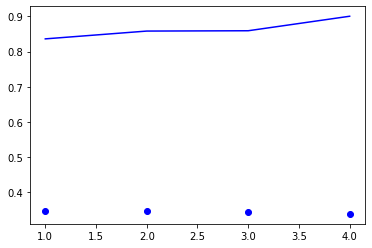

In [85]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
acc = history_dict['acc']
epochs = range(1, len(acc)+1)

plt.plot(epochs, loss_values, 'bo')
plt.plot(epochs, val_loss_values, 'b')
plt.show()

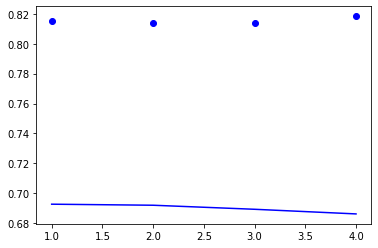

In [86]:
import matplotlib.pyplot as plt
history_dict = history.history
acc_values = history_dict['acc']
val_acc = history_dict['val_acc']
acc = history_dict['acc']
epochs = range(1, len(acc)+1)

plt.plot(epochs, acc_values, 'bo')
plt.plot(epochs, val_acc, 'b')
plt.show()

In [87]:
model.evaluate(x_test, y_test)

25000/25000 [==============================] - 2s 74us/step


[1.3750405503082275, 0.62852]

In [0]:
#Experiments

In [0]:
## 3 hidden layers

In [95]:
model.add(Dense(16, activation='relu', input_shape=(10000,)))
model.add(Dense(16, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(partial_x_train, partial_y_train, batch_size=512, epochs=5, verbose=1, validation_data=(x_val, y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/5
15000/15000 [==============================] - 4s 239us/step - loss: 0.6452 - acc: 0.8441 - val_loss: 0.6678 - val_acc: 0.6553
Epoch 2/5
15000/15000 [==============================] - 2s 138us/step - loss: 0.5841 - acc: 0.8759 - val_loss: 0.6398 - val_acc: 0.6756
Epoch 3/5
15000/15000 [==============================] - 2s 139us/step - loss: 0.5295 - acc: 0.8823 - val_loss: 0.6654 - val_acc: 0.6731
Epoch 4/5
15000/15000 [==============================] - 2s 140us/step - loss: 0.4914 - acc: 0.8797 - val_loss: 0.6568 - val_acc: 0.6663
Epoch 5/5
15000/15000 [==============================] - 2s 139us/step - loss: 0.4729 - acc: 0.8713 - val_loss: 0.7901 - val_acc: 0.6524


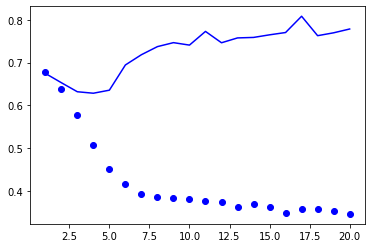

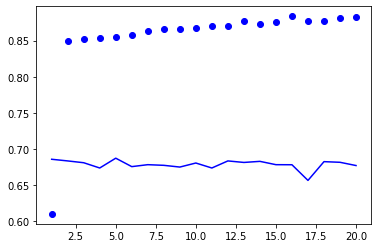

In [93]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
acc = history_dict['acc']
epochs = range(1, len(acc)+1)

plt.plot(epochs, loss_values, 'bo')
plt.plot(epochs, val_loss_values, 'b')
plt.show()



import matplotlib.pyplot as plt
history_dict = history.history
acc_values = history_dict['acc']
val_acc = history_dict['val_acc']
acc = history_dict['acc']
epochs = range(1, len(acc)+1)

plt.plot(epochs, acc_values, 'bo')
plt.plot(epochs, val_acc, 'b')
plt.show()

In [96]:
model.evaluate(x_test, y_test)
# 3 layer sucks!

25000/25000 [==============================] - 2s 75us/step


[0.8546614099502563, 0.59344]

In [100]:
## 1 layer
model.add(Dense(16, activation='relu', input_shape=(10000,)))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(partial_x_train, partial_y_train, batch_size=512, epochs=4, verbose=1, validation_data=(x_val, y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/4
15000/15000 [==============================] - 4s 298us/step - loss: 0.6946 - acc: 0.4965 - val_loss: 0.6931 - val_acc: 0.5053
Epoch 2/4
15000/15000 [==============================] - 2s 139us/step - loss: 0.6932 - acc: 0.5003 - val_loss: 0.6933 - val_acc: 0.4947
Epoch 3/4
15000/15000 [==============================] - 2s 140us/step - loss: 0.6932 - acc: 0.5035 - val_loss: 0.6932 - val_acc: 0.4947
Epoch 4/4
15000/15000 [==============================] - 2s 140us/step - loss: 0.6932 - acc: 0.5035 - val_loss: 0.6932 - val_acc: 0.4947


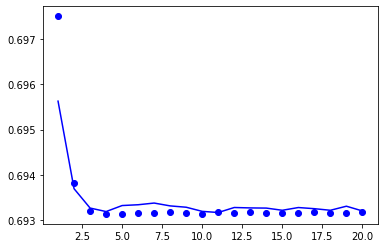

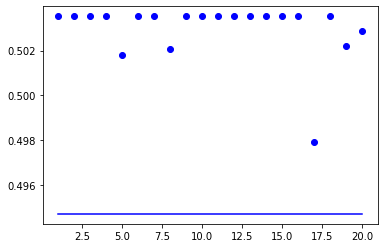

In [99]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
acc = history_dict['acc']
epochs = range(1, len(acc)+1)

plt.plot(epochs, loss_values, 'bo')
plt.plot(epochs, val_loss_values, 'b')
plt.show()



import matplotlib.pyplot as plt
history_dict = history.history
acc_values = history_dict['acc']
val_acc = history_dict['val_acc']
acc = history_dict['acc']
epochs = range(1, len(acc)+1)

plt.plot(epochs, acc_values, 'bo')
plt.plot(epochs, val_acc, 'b')
plt.show()

In [102]:
# 1 layer is mega suck!
model.evaluate(x_test, y_test)

25000/25000 [==============================] - 2s 77us/step


[0.6931479050445557, 0.5]